In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [8]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
train_data = X_train.join(y_train)

In [12]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4457,-118.18,34.09,44.0,1688.0,426.0,1605.0,384.0,3.3785,<1H OCEAN,184900.0
9672,-119.08,37.78,17.0,1631.0,335.0,285.0,128.0,2.7656,INLAND,130000.0
2783,-118.18,37.35,16.0,3806.0,794.0,1501.0,714.0,2.1212,INLAND,108300.0
4069,-118.48,34.16,30.0,3507.0,536.0,1427.0,525.0,6.7082,<1H OCEAN,500001.0
18216,-122.07,37.39,19.0,1465.0,342.0,646.0,345.0,4.7120,NEAR BAY,289300.0
...,...,...,...,...,...,...,...,...,...,...
9966,-122.40,38.46,33.0,2542.0,466.0,1099.0,420.0,4.6350,INLAND,248500.0
17059,-122.24,37.48,47.0,2423.0,407.0,1010.0,407.0,6.2154,NEAR OCEAN,362700.0
18251,-122.10,37.39,31.0,1117.0,304.0,591.0,302.0,3.5909,NEAR BAY,353100.0
5052,-118.34,34.01,37.0,4291.0,1102.0,1941.0,953.0,1.7945,<1H OCEAN,106300.0


In [13]:
train_data_without_op = train_data.drop(['ocean_proximity'], axis = 1)

In [14]:
train_data_without_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4457,-118.18,34.09,44.0,1688.0,426.0,1605.0,384.0,3.3785,184900.0
9672,-119.08,37.78,17.0,1631.0,335.0,285.0,128.0,2.7656,130000.0
2783,-118.18,37.35,16.0,3806.0,794.0,1501.0,714.0,2.1212,108300.0
4069,-118.48,34.16,30.0,3507.0,536.0,1427.0,525.0,6.7082,500001.0
18216,-122.07,37.39,19.0,1465.0,342.0,646.0,345.0,4.7120,289300.0
...,...,...,...,...,...,...,...,...,...
9966,-122.40,38.46,33.0,2542.0,466.0,1099.0,420.0,4.6350,248500.0
17059,-122.24,37.48,47.0,2423.0,407.0,1010.0,407.0,6.2154,362700.0
18251,-122.10,37.39,31.0,1117.0,304.0,591.0,302.0,3.5909,353100.0
5052,-118.34,34.01,37.0,4291.0,1102.0,1941.0,953.0,1.7945,106300.0


In [15]:
count_zeros = (train_data_without_op == 0).sum()
print(count_zeros)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [16]:
train_data_without_op.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924095,-0.110774,0.044795,0.066845,0.098349,0.053761,-0.013322,-0.044094
latitude,-0.924095,1.000000,0.012895,-0.036585,-0.064975,-0.109137,-0.070519,-0.081324,-0.146458
housing_median_age,-0.110774,0.012895,1.000000,-0.362606,-0.320327,-0.295722,-0.301853,-0.118847,0.105875
total_rooms,0.044795,-0.036585,-0.362606,1.000000,0.929660,0.851735,0.917581,0.198448,0.133674
total_bedrooms,0.066845,-0.064975,-0.320327,0.929660,1.000000,0.872359,0.978719,-0.011164,0.048059
population,0.098349,-0.109137,-0.295722,0.851735,0.872359,1.000000,0.903098,0.002280,-0.025432
households,0.053761,-0.070519,-0.301853,0.917581,0.978719,0.903098,1.000000,0.010528,0.064393
median_income,-0.013322,-0.081324,-0.118847,0.198448,-0.011164,0.002280,0.010528,1.000000,0.686914
median_house_value,-0.044094,-0.146458,0.105875,0.133674,0.048059,-0.025432,0.064393,0.686914,1.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

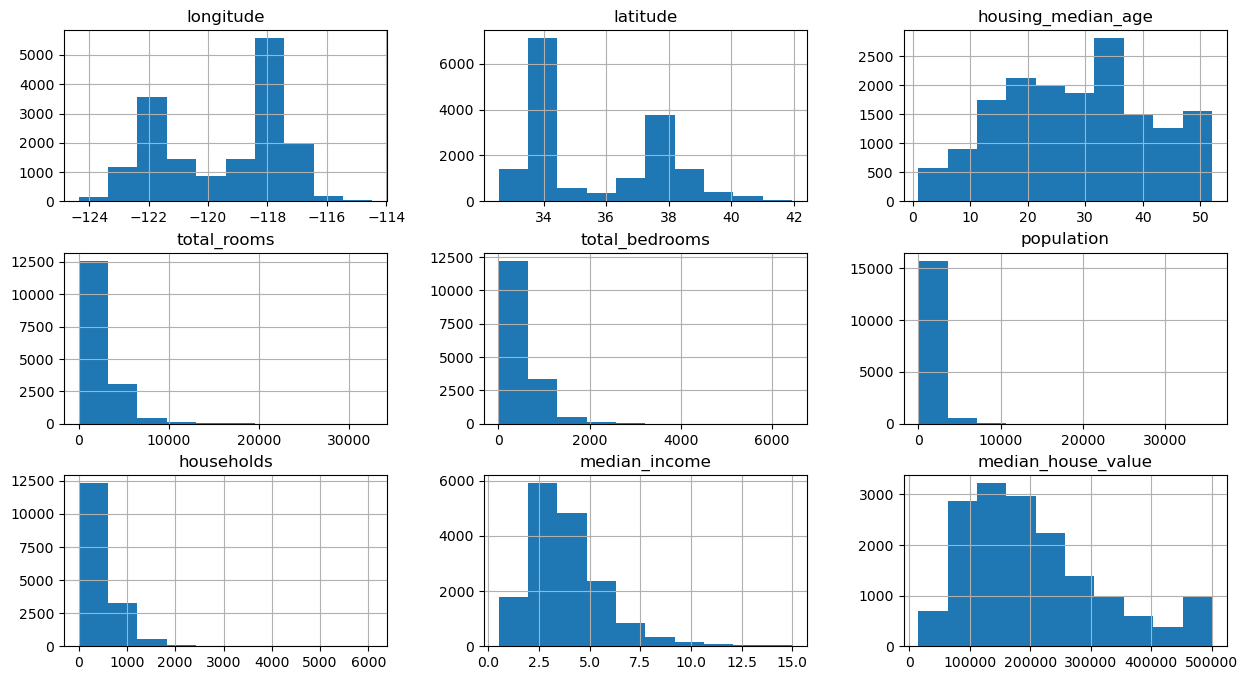

In [17]:
train_data_without_op.hist(figsize = (15, 8))

<Axes: >

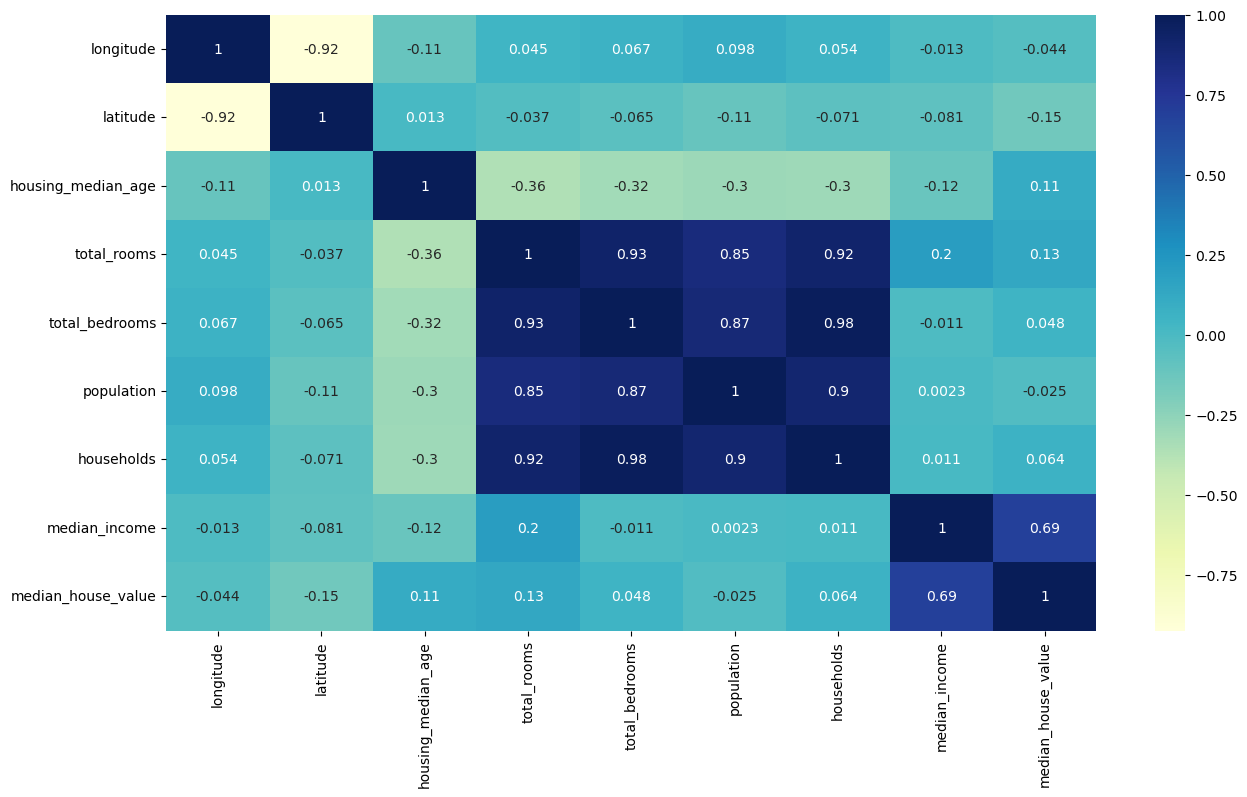

In [18]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data_without_op.corr(), annot = True, cmap = "YlGnBu")

In [19]:
transformed_households, lambda_value1 = boxcox(train_data_without_op['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(train_data_without_op['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(train_data_without_op['population'])
transformed_totalrooms, lambda_value4 = boxcox(train_data_without_op['total_rooms'])

In [20]:
train_data_without_op['households'] = transformed_households
train_data_without_op['total_bedrooms'] = transformed_totalsbedrooms
train_data_without_op['total_rooms'] = transformed_totalrooms
train_data_without_op['population'] = transformed_population

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

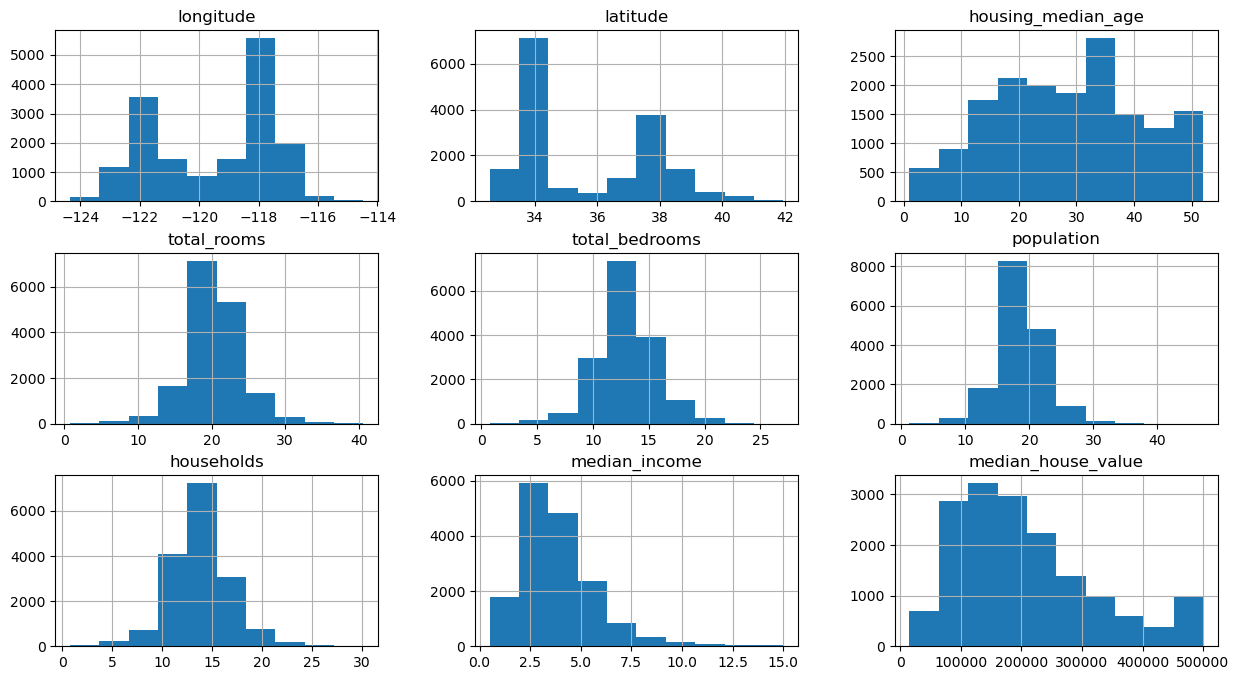

In [21]:
train_data_without_op.hist(figsize = (15, 8))

# Start preprocess

In [22]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [23]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [24]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4457,True,False,False,False,False
9672,False,True,False,False,False
2783,False,True,False,False,False
4069,True,False,False,False,False
18216,False,False,False,True,False
...,...,...,...,...,...
9966,False,True,False,False,False
17059,False,False,False,False,True
18251,False,False,False,True,False
5052,True,False,False,False,False


In [25]:
data = data.join(pd.get_dummies(data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [26]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [27]:
transformed_households, lambda_value4 = boxcox(data['households'])
transformed_totalsbedrooms, lambda_value2 = boxcox(data['total_bedrooms'])
transformed_population, lambda_value3 = boxcox(data['population'])
transformed_totalrooms, lambda_value1 = boxcox(data['total_rooms'])

data['households'] = transformed_households
data['total_bedrooms'] = transformed_totalsbedrooms
data['total_rooms'] = transformed_totalrooms
data['population'] = transformed_population

In [28]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,False,True,False,False,False


In [29]:
data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']] = data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']].astype(int)

In [30]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,15.711183,8.812635,12.313702,9.276867,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,27.567255,17.043806,22.349787,18.837657,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,18.129399,10.018273,14.089610,10.438155,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,17.434442,10.726091,14.606008,11.216602,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,18.653359,11.335470,14.661511,11.859220,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,18.771858,12.396339,16.544107,12.835209,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,14.695478,9.269814,12.710336,8.952949,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,20.383726,13.409430,17.422049,14.000827,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,19.348787,12.738405,15.910079,13.069100,1.8672,84700.0,0,1,0,0,0


In [31]:
X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [32]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [33]:
train_data = X_train.join(y_train)

<Axes: >

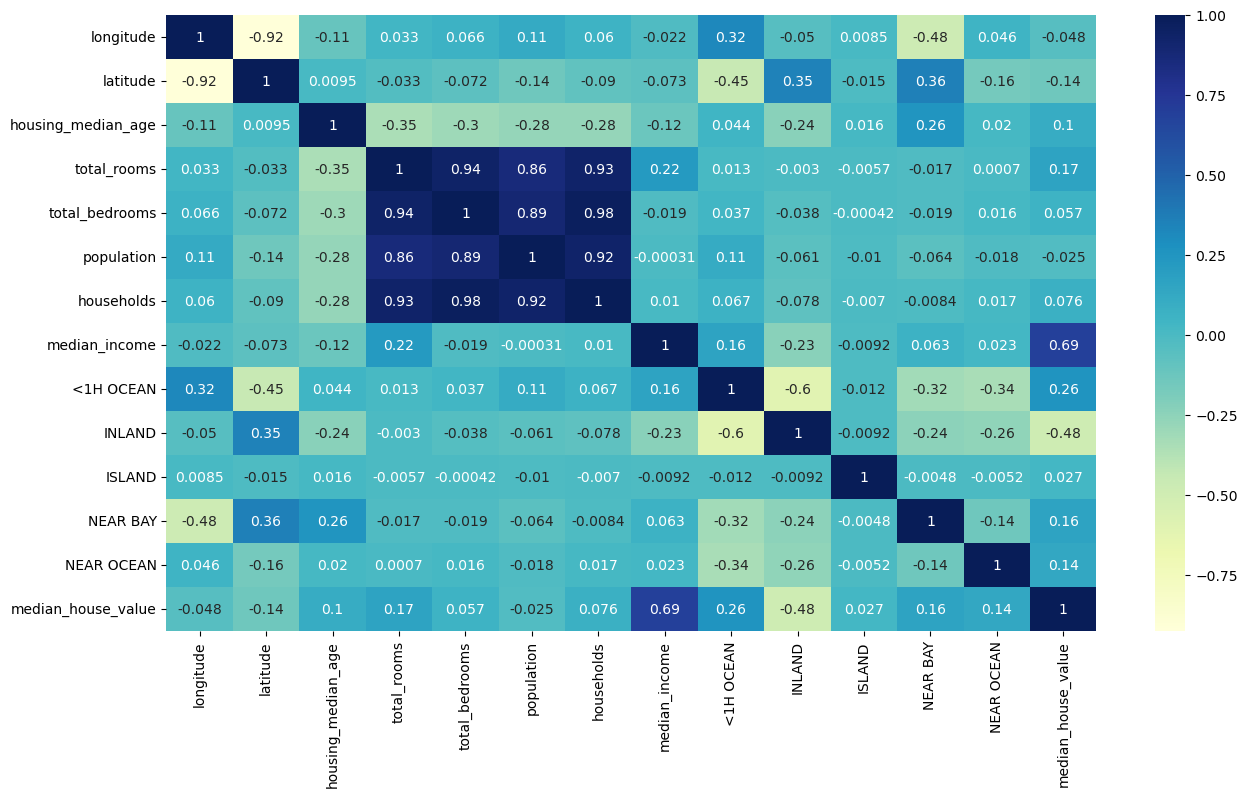

In [34]:
plt.figure(figsize = (15, 8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [35]:
Scaler = StandardScaler()

In [36]:
X_train_scaler = Scaler.fit_transform(X_train)
X_test_scaler = Scaler.transform(X_test)
X_validate_scaler = Scaler.transform(X_validate)

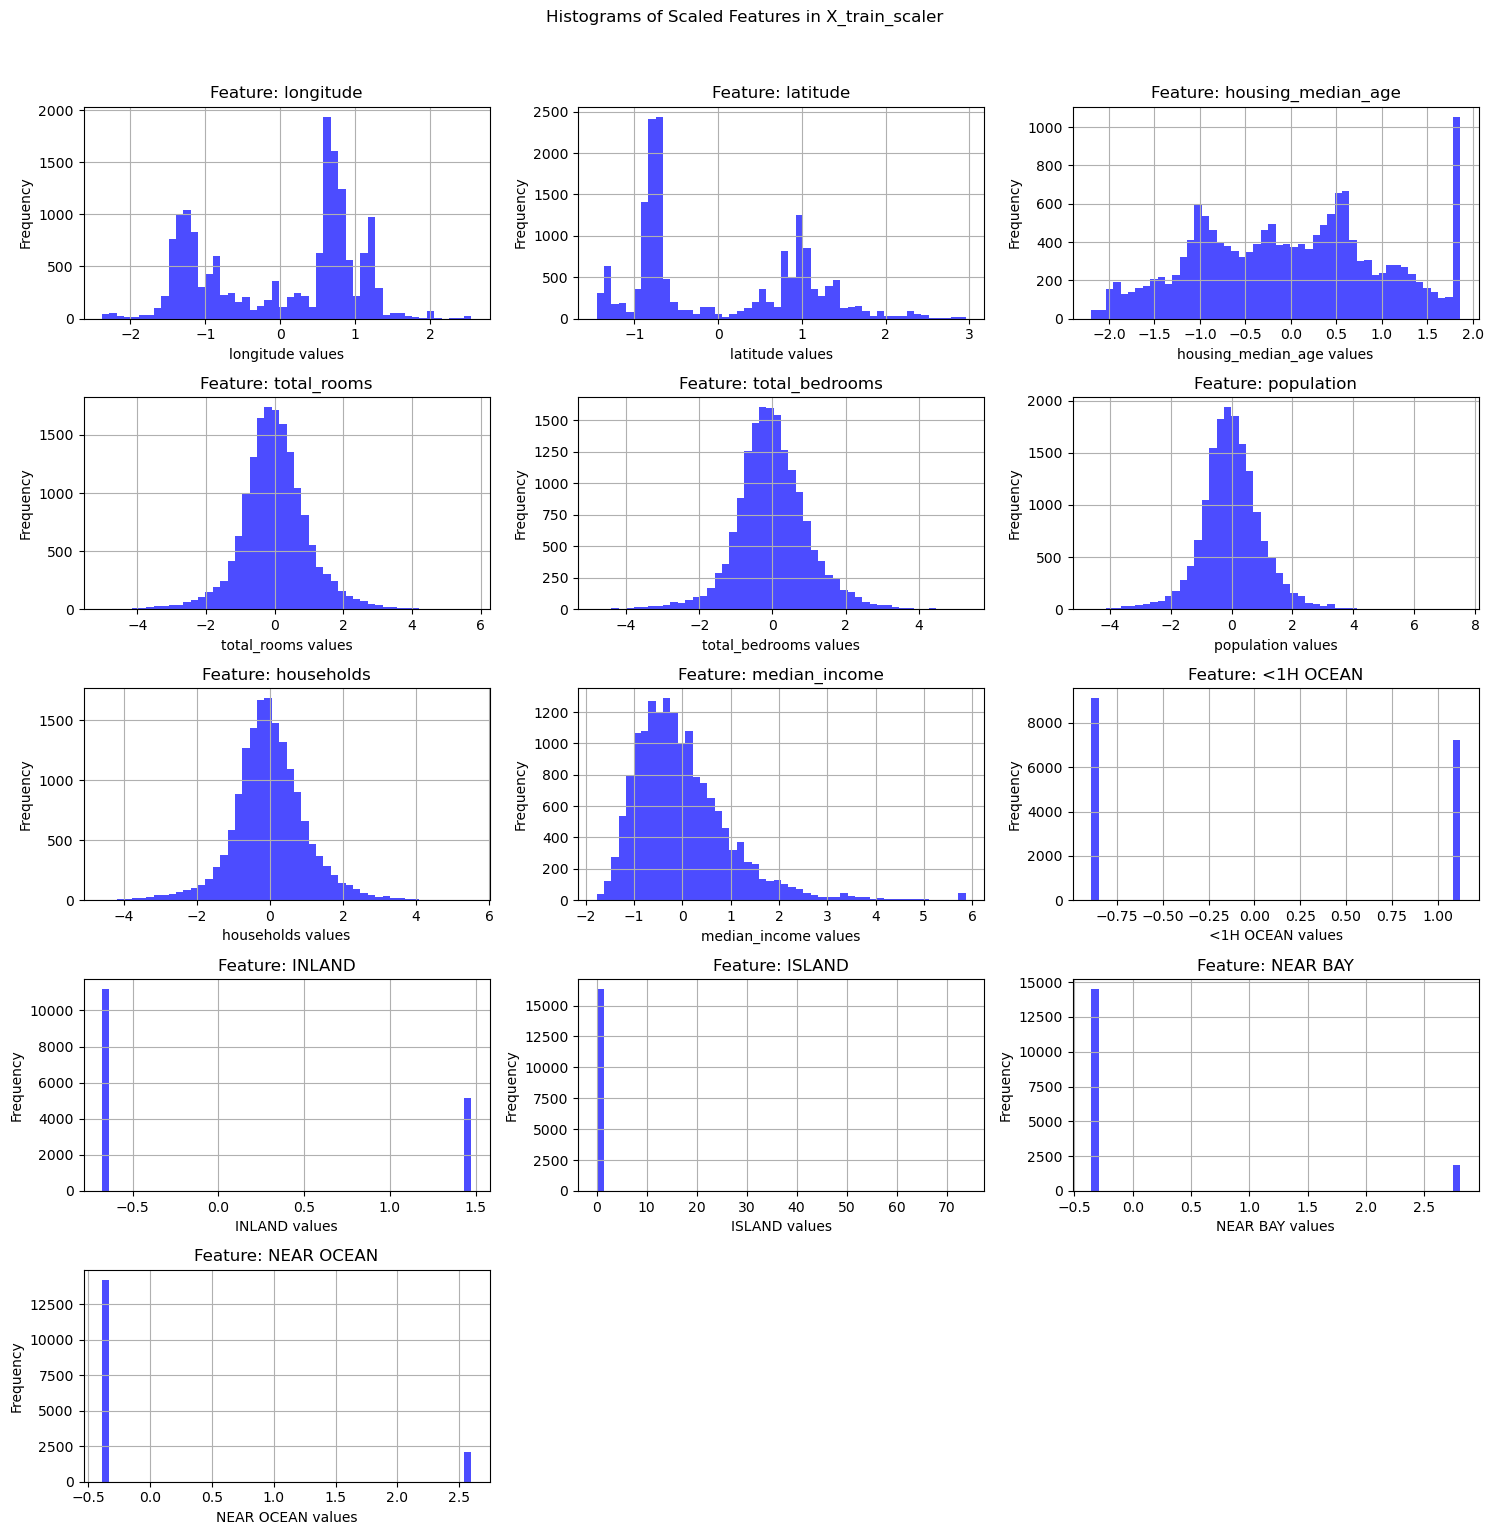

In [37]:
num_features = X_train_scaler.shape[1]
num_cols = 3  
num_rows = -(-num_features // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))
fig.suptitle('Histograms of Scaled Features in X_train_scaler', y=1.02)

for i in range(num_features):
    row_idx = i // num_cols
    col_idx = i % num_cols
    axes[row_idx, col_idx].hist(X_train_scaler[:, i], bins=50, color='blue', alpha=0.7)
    axes[row_idx, col_idx].set_title(f'Feature: {X.columns[i]}')
    axes[row_idx, col_idx].set_xlabel(f'{X.columns[i]} values')
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].grid(True)

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [38]:
reg_lasso = Lasso(max_iter = 10000) # Features selection
reg_lasso.fit(X_train_scaler, y_train)
reg_lasso.score(X_validate_scaler, y_validate)

0.6824110171810647

In [39]:
reg_lasso.coef_ # Bổ sung phần này sử dụng Lasso Regression để thực hiện features selection, khi chạy xong mô hình ko có hệ số nào bằng 0 nên không loại bỏ bất kì thuộc tính nào

array([-5.90970877e+04, -6.09877294e+04,  1.33899074e+04, -3.16191636e+04,
        6.82374774e+04, -6.28115264e+04,  2.92334216e+04,  7.97536853e+04,
        4.87694275e+03, -1.08817344e+04,  2.63917906e+03, -2.43791676e-02,
        2.50639736e+03])

# End preprocess

## Linear Regression 

In [40]:
reg = LinearRegression()

In [41]:
reg.fit(X_train_scaler, y_train)

LinearRegression()

In [67]:
reg.coef_

array([-59124.09564607, -61014.54919648,  13390.40665571, -31656.37190084,
        68273.71318148, -62822.62671863,  29243.80302271,  79763.58282897,
         6167.17755261,  -9664.91048268,   2675.11782331,    818.12425532,
         3376.94266247])

In [68]:
reg.intercept_

206644.400097883

In [65]:
print("Score: {}".format(reg.score(X_validate_scaler, y_validate)))

y_pred = reg.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.6824074055047504
RMSE: 65678.06499611227
MAE: 47954.42571835855


In [80]:
reg_ridge = Ridge(alpha = 0.01)

In [81]:
reg_ridge.fit(X_train_scaler, y_train)

Ridge(alpha=0.01)

In [82]:
reg_ridge.coef_

array([-59122.76865334, -61013.17413964,  13390.41363978, -31655.19378997,
        68271.88520328, -62822.34301441,  29244.2282959 ,  79763.24874563,
         6167.3013513 ,  -9665.25581593,   2675.13347573,    818.2628793 ,
         3377.10627868])

In [83]:
reg_ridge.intercept_

206644.400097883

In [84]:
print("Score: {}".format(reg_ridge.score(X_validate_scaler, y_validate)))

y_pred = reg_ridge.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.6824075491216297
RMSE: 65678.05014614416
MAE: 47954.40690424109


In [85]:
param_grid_ridge = {'alpha': [0.01, 0.1, 1, 10]}
grid_search_ridge = GridSearchCV(reg_ridge, param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_search_ridge.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=0.01),
             param_grid={'alpha': [0.01, 0.1, 1, 10]},
             scoring='neg_root_mean_squared_error')

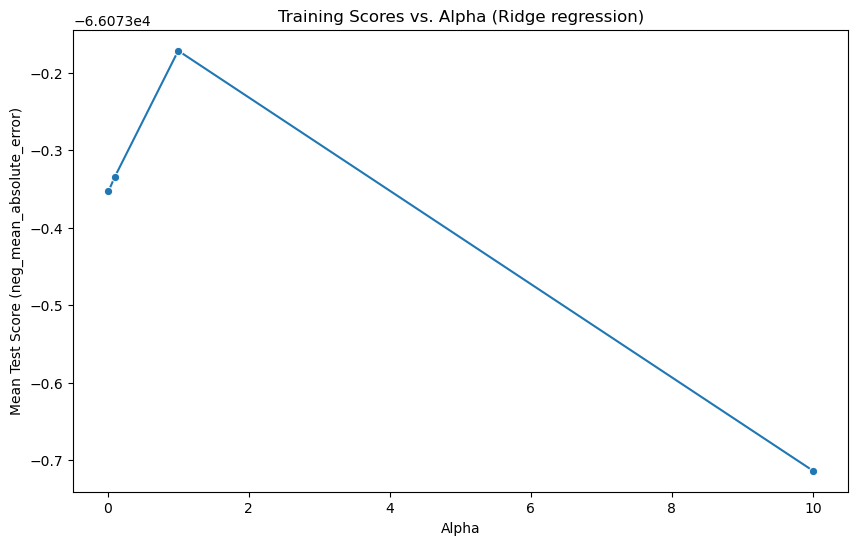

In [86]:
results = pd.DataFrame(grid_search_ridge.cv_results_)

param_cols = ['param_alpha', 'mean_test_score']
subset = results[param_cols].copy()  

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_alpha', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Alpha (Ridge regression)')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score (neg_mean_absolute_error)')

plt.show()

In [87]:
grid_search_ridge.best_estimator_

Ridge(alpha=1)

In [88]:
best_ridge = grid_search_ridge.best_estimator_

In [89]:
print("Score: {}".format(best_ridge.score(X_validate_scaler, y_validate)))

y_pred = best_ridge.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.6824215518897303
RMSE: 65676.60224547716
MAE: 47952.550818421274


## Random forest

In [90]:
forest = RandomForestRegressor()

In [91]:
forest.fit(X_train_scaler, y_train)

RandomForestRegressor()

In [98]:
print("Score: {}".format(forest.score(X_validate_scaler, y_validate)))

y_pred = forest.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.8283406777310535
RMSE: 48285.736752113065
MAE: 31843.9906020558


In [93]:
param_grid = {
    "n_estimators" : [50, 100, 200],
    "max_features" : [6, 10, 13],
    "min_samples_split":[2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_root_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [6, 10, 13],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [94]:
grid_search.best_estimator_

RandomForestRegressor(max_features=10, n_estimators=200)

In [95]:
print(grid_search.best_estimator_)

RandomForestRegressor(max_features=10, n_estimators=200)


In [96]:
best_forest = grid_search.best_estimator_

In [97]:
print("Score: {}".format(best_forest.score(X_validate_scaler, y_validate)))

y_pred = best_forest.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.8321108329545543
RMSE: 47752.54282936565
MAE: 31604.727378854623


## Neural network

In [59]:
nn = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu',max_iter=10000, random_state=42)

nn.fit(X_train_scaler, y_train)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=42)

In [99]:
print("Score: {}".format(nn.score(X_validate_scaler, y_validate)))

y_pred = nn.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.7889377868793123
RMSE: 53541.48463072118
MAE: 36790.223331688896


In [52]:
param_grid = {
    "activation" : ['relu', 'identity', 'tanh', 'logistic']
}

grid_search = GridSearchCV(nn, param_grid, cv = 3, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(X_train_scaler, y_train)

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic O

GridSearchCV(cv=3,
             estimator=MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000,
                                    random_state=42),
             param_grid={'activation': ['relu', 'identity', 'tanh',
                                        'logistic']},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
print(grid_search.best_estimator_)

MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=10000, random_state=42)


In [101]:
nn_iden =  MLPRegressor(hidden_layer_sizes=(50, 50), activation='identity',
                  max_iter=5000, learning_rate_init=0.001, random_state=42)
nn_iden.fit(X_train_scaler, y_train)
nn_iden.score(X_validate_scaler, y_validate)

0.6831032316366334

In [102]:
print("Score: {}".format(nn_iden.score(X_validate_scaler, y_validate)))

y_pred = nn_iden.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.6831032316366334
RMSE: 65606.07721375876
MAE: 47938.67798022011


## KNN

In [103]:
knn = KNeighborsRegressor(n_neighbors=4, weights='distance')

knn.fit(X_train_scaler, y_train)

KNeighborsRegressor(n_neighbors=4, weights='distance')

In [104]:
knn.score(X_validate_scaler, y_validate)

0.7316256778747743

In [105]:
print("Score: {}".format(knn.score(X_validate_scaler, y_validate)))

y_pred = knn.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.7316256778747743
RMSE: 60374.79175599946
MAE: 40616.84539184465


In [106]:
param_grid = {
    'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72, 100, 101, 102, 200, 300, 400, 500] 
}

In [107]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train_scaler, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=4, weights='distance'),
             param_grid={'n_neighbors': [8, 39, 40, 41, 50, 51, 52, 70, 71, 72,
                                         100, 101, 102, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [108]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=8, weights='distance')

In [109]:
best_knn = grid_search.best_estimator_

In [110]:
print(best_knn)

KNeighborsRegressor(n_neighbors=8, weights='distance')


In [111]:
print("Score: {}".format(best_knn.score(X_validate_scaler, y_validate)))

y_pred = best_knn.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.7485789895290835
RMSE: 58436.735866640236
MAE: 39567.01145011217


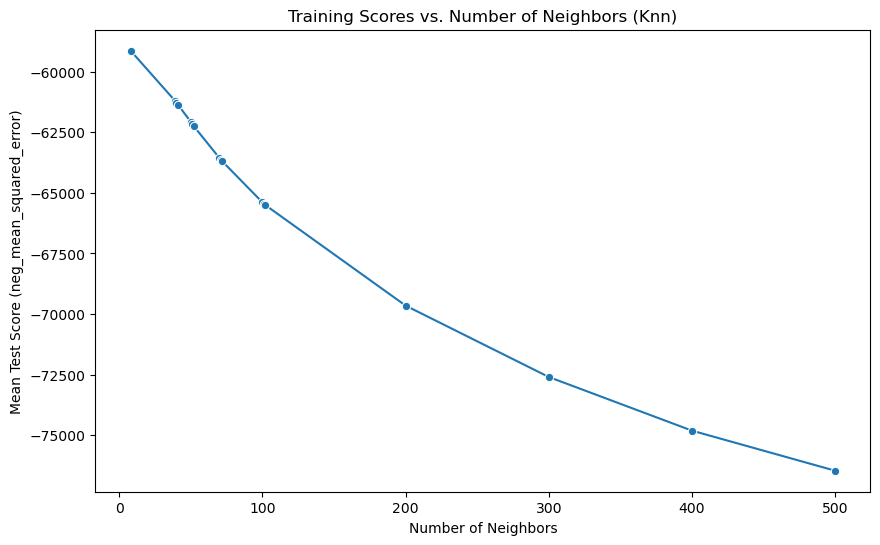

In [112]:
results = pd.DataFrame(grid_search.cv_results_)

param_cols = ['param_n_neighbors', 'mean_test_score']
subset = results[param_cols].copy()  

subset['param_n_neighbors'] = subset['param_n_neighbors'].astype(int)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_n_neighbors', y='mean_test_score', data=subset, marker='o')

plt.title('Training Scores vs. Number of Neighbors (Knn)')
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Test Score (neg_mean_squared_error)')

plt.show()

In [113]:
knn_changeMetric = KNeighborsRegressor(n_neighbors=8, weights='distance')

In [115]:
param_grid = {
    'metric': ['euclidean', 'manhattan','chebyshev', 'minkowski'] 
}
grid_search = GridSearchCV(knn_changeMetric, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaler, y_train)  

GridSearchCV(cv=5,
             estimator=KNeighborsRegressor(n_neighbors=8, weights='distance'),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski']},
             scoring='neg_mean_absolute_error')

In [116]:
grid_search.best_estimator_

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')

In [117]:
best_knn_changeMetric = grid_search.best_estimator_
print(best_knn_changeMetric)

KNeighborsRegressor(metric='manhattan', n_neighbors=8, weights='distance')


In [118]:
print("Score: {}".format(best_knn_changeMetric.score(X_validate_scaler, y_validate)))

y_pred = best_knn_changeMetric.predict(X_validate_scaler)
print("RMSE: {}".format(mean_squared_error(y_validate, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_validate, y_pred)))

Score: 0.7516721930559376
RMSE: 58076.15319131622
MAE: 39027.42563537548


<Axes: xlabel='param_metric', ylabel='mean_test_score'>

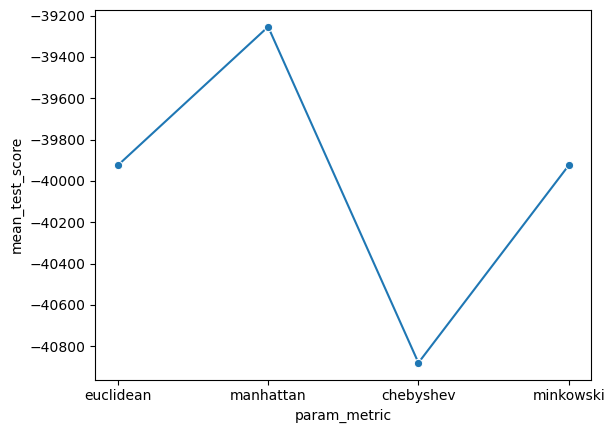

In [120]:
results = pd.DataFrame(grid_search.cv_results_)

subset = results[['param_metric', 'mean_test_score']]

sns.lineplot(x='param_metric', y='mean_test_score', data=subset, marker='o')

## Predict on test set

In [121]:
best_ridge.predict(X_test_scaler)

array([253148.89088385, 276906.2670353 , 123239.48312225, ...,
       246456.52149268, 120175.3091436 , 176740.34704381])

In [122]:
best_forest.predict(X_test_scaler)

array([190679.03 , 391661.17 ,  98740.   , ..., 319838.135, 101148.   ,
        99697.5  ])

In [123]:
nn.predict(X_test_scaler)

array([199389.22944828, 344913.86136946,  99668.70220338, ...,
       259323.19141944, 153304.97578508,  99592.2095619 ])

In [124]:
best_knn.predict(X_test_scaler)

array([127986.51621699, 281176.76761233,  88977.54618983, ...,
       148662.37632542, 157722.69674435,  82254.67837296])

(-62500.0, 600001.0)

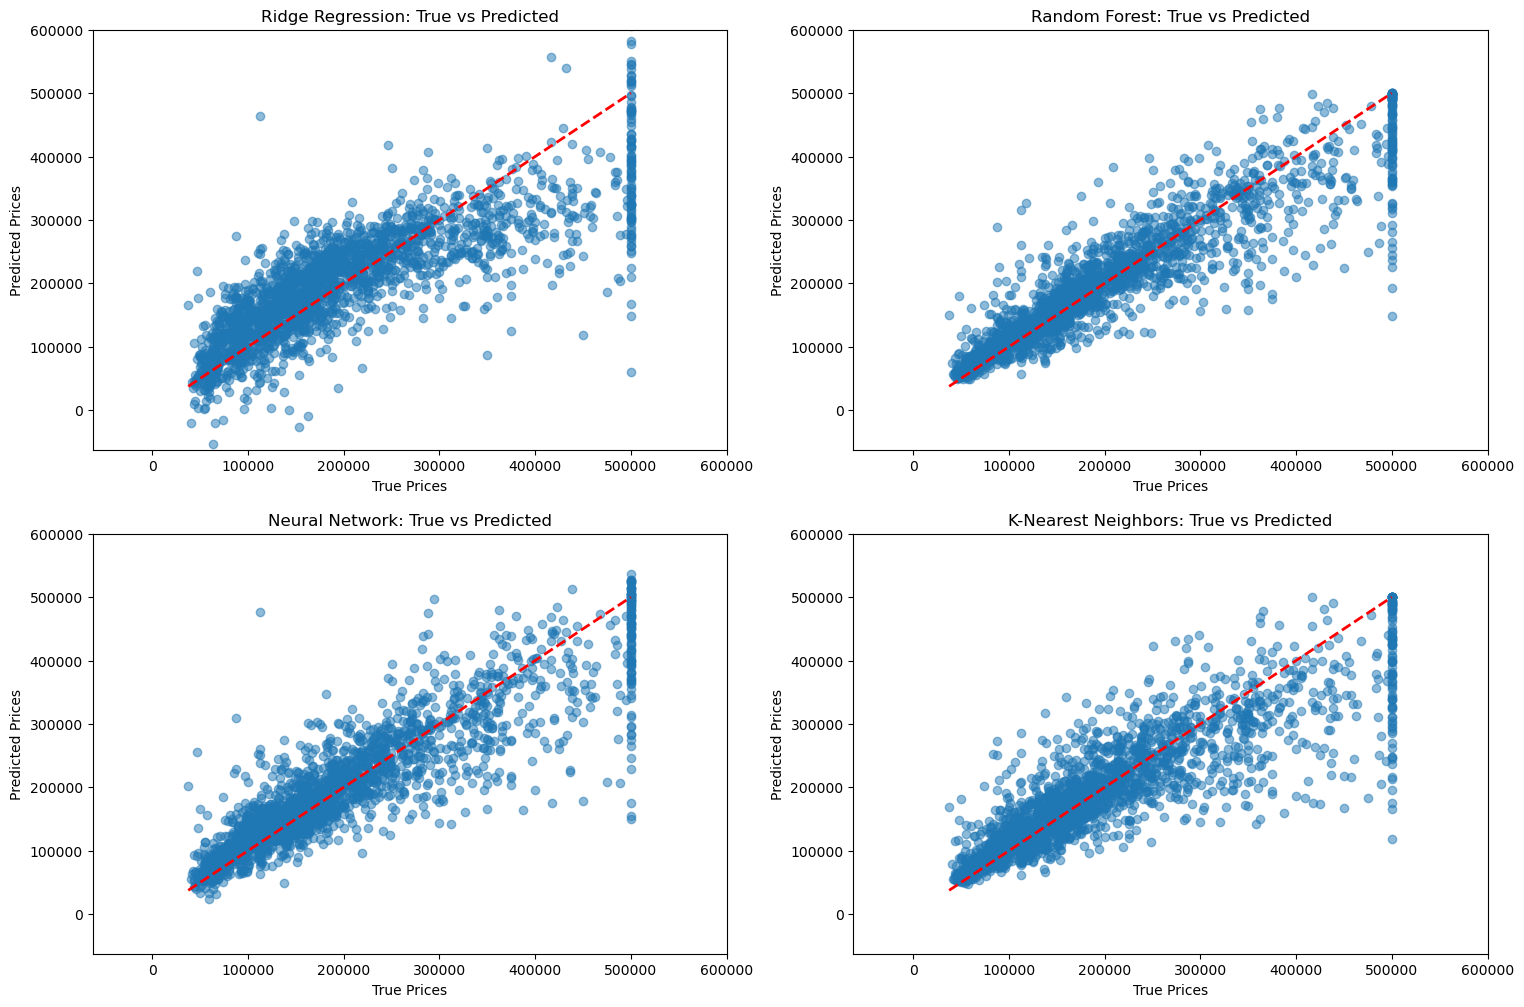

In [126]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.scatter(y_test, best_ridge.predict(X_test_scaler), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Ridge Regression: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 2, 2)
plt.scatter(y_test, best_forest.predict(X_test_scaler), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)  
plt.title('Random Forest: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 2, 3)
plt.scatter(y_test, nn.predict(X_test_scaler), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('Neural Network: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])

plt.subplot(2, 2, 4)
plt.scatter(y_test,best_knn.predict(X_test_scaler), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2) 
plt.title('K-Nearest Neighbors: True vs Predicted')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.xlim([min(y_test) - 100000, max(y_test) + 100000])
plt.ylim([min(y_test) - 100000, max(y_test) + 100000])


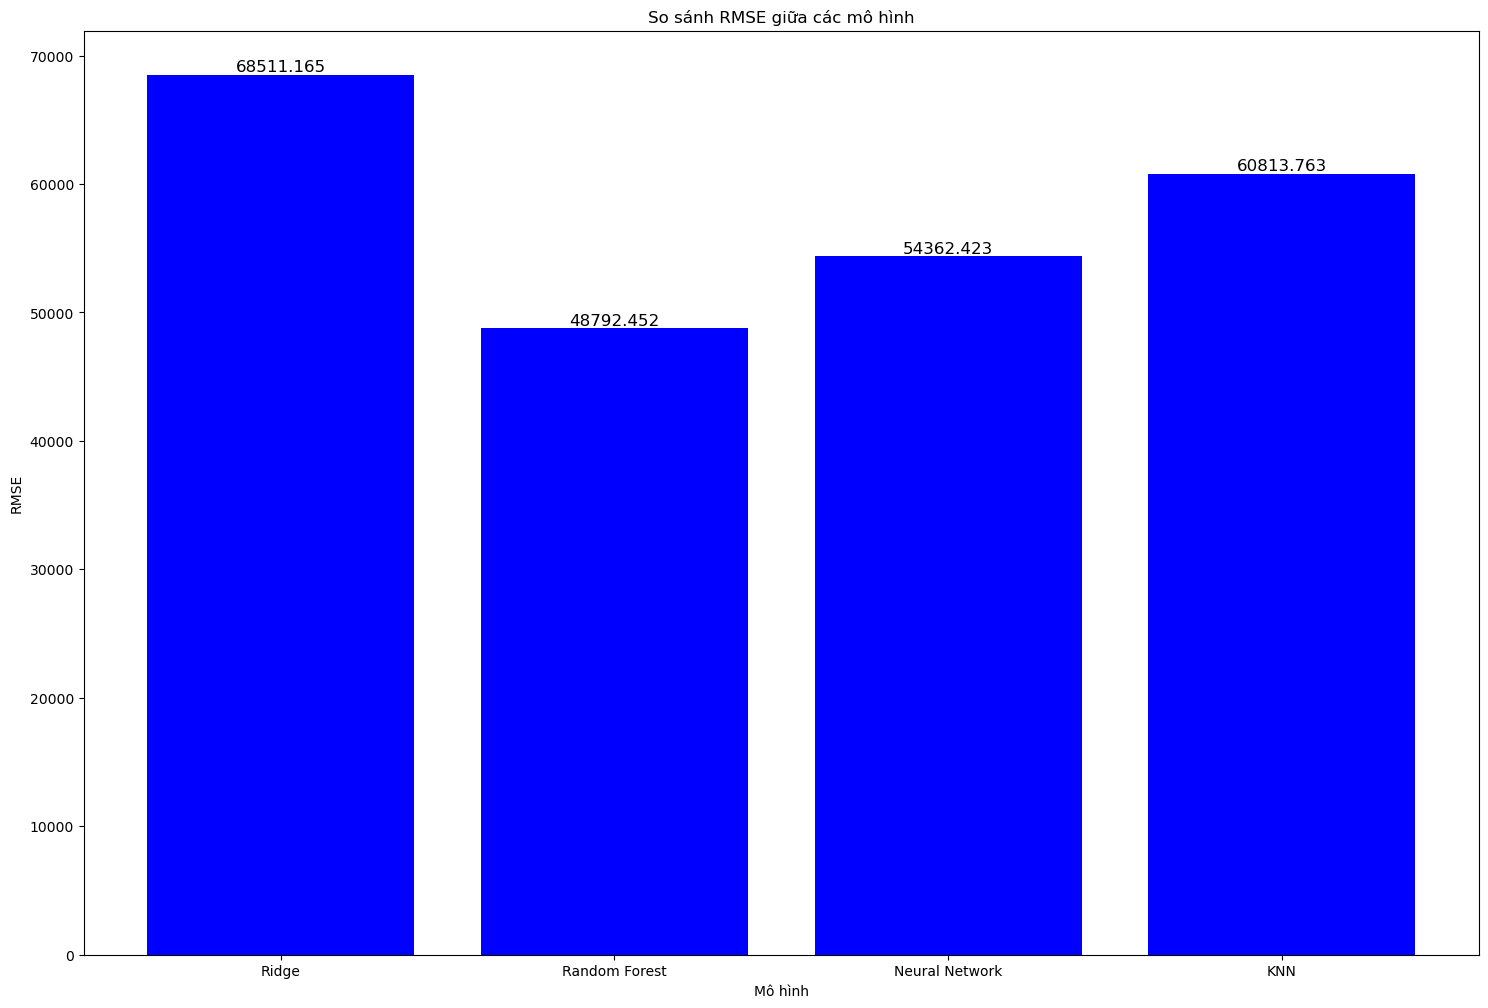

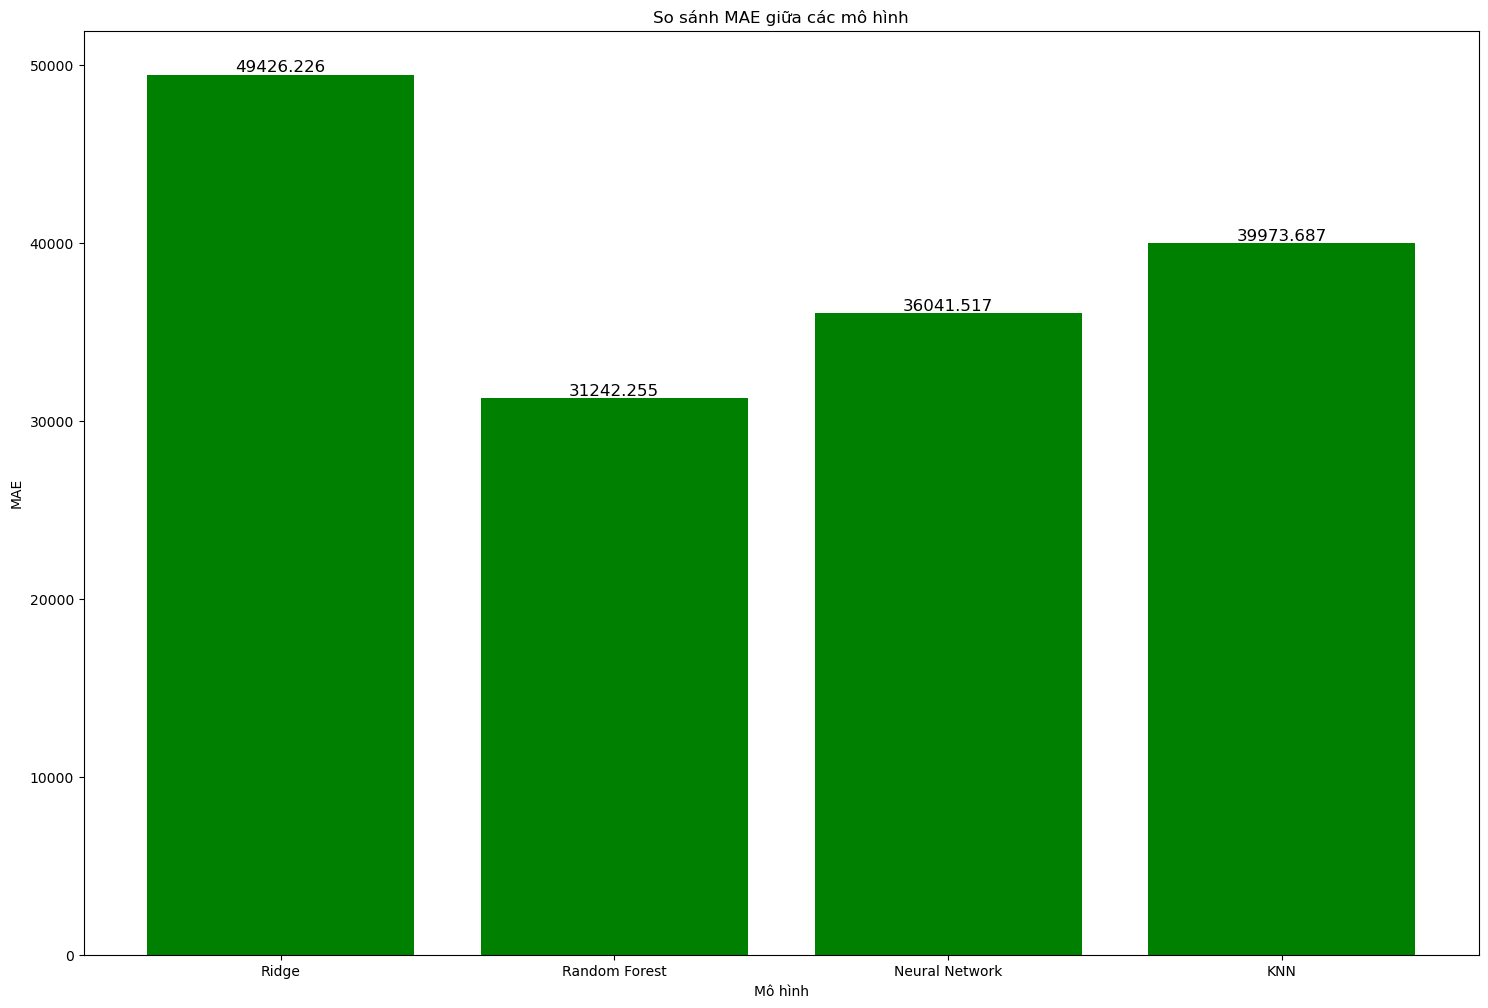

In [129]:
# Định nghĩa các biến
rmse_ridge = np.sqrt(mean_squared_error(y_test, best_ridge.predict(X_test_scaler)))
rmse_forest = np.sqrt(mean_squared_error(y_test, best_forest.predict(X_test_scaler)))
rmse_nn = np.sqrt(mean_squared_error(y_test, nn.predict(X_test_scaler)))
rmse_knn = np.sqrt(mean_squared_error(y_test, best_knn.predict(X_test_scaler)))

mae_ridge = mean_absolute_error(y_test, best_ridge.predict(X_test_scaler))
mae_forest = mean_absolute_error(y_test, best_forest.predict(X_test_scaler))
mae_nn = mean_absolute_error(y_test, nn.predict(X_test_scaler))
mae_knn = mean_absolute_error(y_test, best_knn.predict(X_test_scaler))

results = pd.DataFrame({
    'Model': ['Ridge', 'Random Forest', 'Neural Network', 'KNN'],
    'RMSE': [rmse_ridge, rmse_forest, rmse_nn, rmse_knn],
    'MAE': [mae_ridge, mae_forest, mae_nn, mae_knn]
})

plt.figure(figsize=(18, 12))
plt.bar(results['Model'], results['RMSE'], label='RMSE', color='blue')
plt.title('So sánh RMSE giữa các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('RMSE')
for i in range(len(results)):
    plt.annotate(f'{results["RMSE"][i]:.3f}', (i, results["RMSE"][i]), ha='center', va='bottom', size=12)

plt.figure(figsize=(18, 12))
plt.bar(results['Model'], results['MAE'], label='MAE', color='green')
plt.title('So sánh MAE giữa các mô hình')
plt.xlabel('Mô hình')
plt.ylabel('MAE')
for i in range(len(results)):
    plt.annotate(f'{results["MAE"][i]:.3f}', (i, results["MAE"][i]), ha='center', va='bottom', size=12)